# Detecting Parking Meter Fraud: A Regression-Based Investigation

---

## Introduction

In May 1978, Brink's Inc. was awarded a contract to collect coins from approximately 70,000 parking meters in New York City. Eventually, the city became suspicious that not all the money collected was being returned. Several Brink's collectors were arrested and convicted of grand larceny. To estimate the amount stolen, the city compared amounts collected from 47 meters emptied by city employees with amounts from meters emptied by various private contractors, including Brink’s. The variables in the dataset include:

- **Contractor**: the amount of money collected in a month by the private contractors (including Brink’s).
- **City**: the amount of money collected in a month by the government (from 47 meters they emptied themselves).
- **Collector**: an indicator variable (0 = not Brink’s, 1 = Brink’s).
- **Time**: the month (from 1 to 47) during the period of observation.

Below is the code for reading in the data, visualizing trends, and performing analyses to assess whether—and by how much—Brink’s may have underreported revenues.

---

In [1]:
meter_data_path = "Data/meter_data.csv"
meter_data = read.csv(meter_data_path)

In [2]:
library(ggplot2)
meters<-meter_data
head(meters)
summary(meters)

,Time,Contractor,City,Collector
,<int>,<int>,<int>,<int>
1,1,2224277,6729,0
2,2,1892672,5751,0
3,3,1468074,6711,0
4,4,1618966,7069,0
5,5,1509195,7134,0
6,6,1511014,5954,0


      Time        Contractor           City        Collector     
 Min.   : 1.0   Min.   : 794191   Min.   :4150   Min.   :0.0000  
 1st Qu.:12.5   1st Qu.:1510104   1st Qu.:6555   1st Qu.:0.0000  
 Median :24.0   Median :1636597   Median :6830   Median :1.0000  
 Mean   :24.0   Mean   :1618343   Mean   :6846   Mean   :0.5106  
 3rd Qu.:35.5   3rd Qu.:1760352   3rd Qu.:7455   3rd Qu.:1.0000  
 Max.   :47.0   Max.   :2224277   Max.   :8126   Max.   :1.0000  

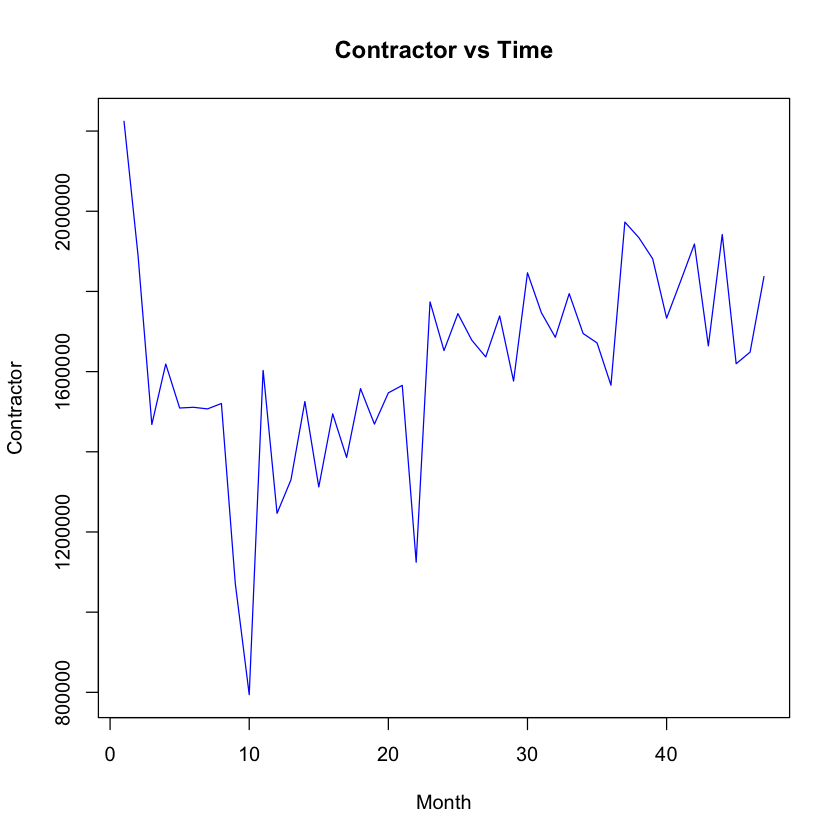

In [3]:
attach(meters)
month <- meters$Time 

plot(month, Contractor, type="l", col="blue", xlab="Month", ylab="Contractor", main="Contractor vs Time")

From a simple line plot of **Contractor** against **month**, there appears to be a slightly upward trend in the amount collected by private contractors over time. The average monthly collection is revealed to be around \$1.62 million, with a minimum of around \$794 thousand and a maximum close to \$2.22 million.  

In [4]:
mean(Contractor)
min(Contractor)
max(Contractor)

[1] 1618343

[1] 794191

[1] 2224277

---

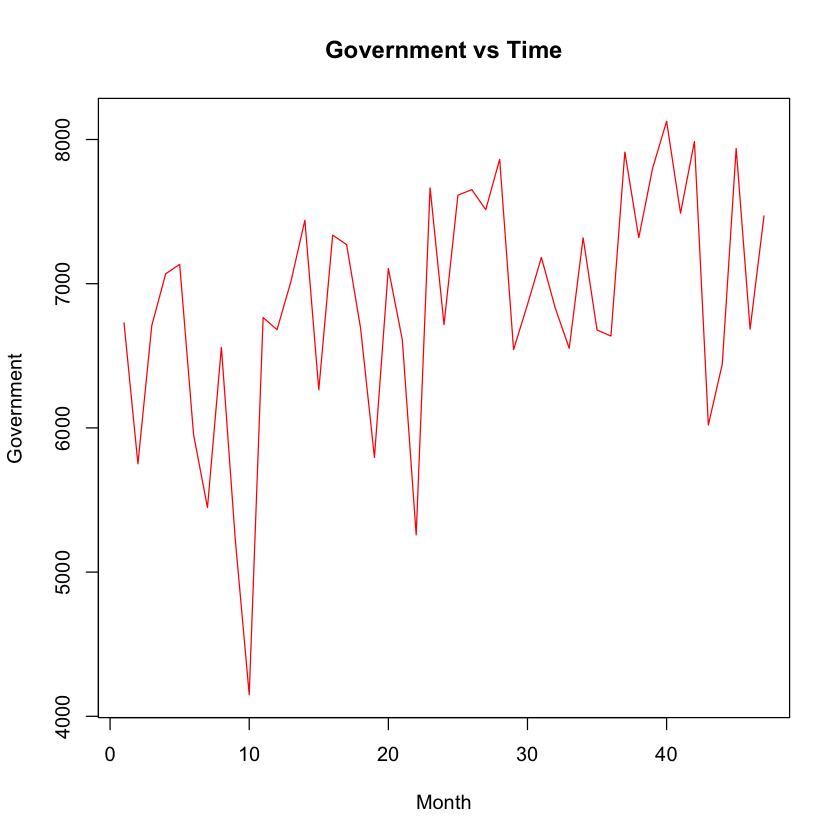

In [5]:
plot(month, City, type="l", col="red", xlab="Month", ylab="Government", main="Government vs Time")

A similar line plot of the **City** collections over time also shows a trend that seems slightly upward, though visual inspection alone can be misleading. In some months, government-collected amounts show considerable fluctuation.  

---

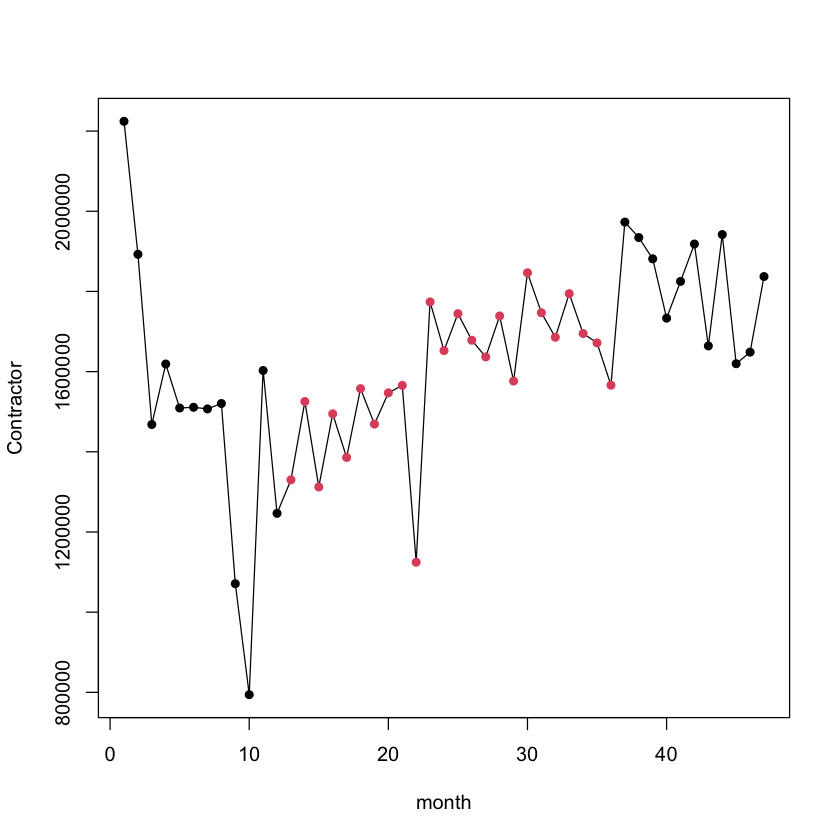

In [6]:
plot(month, Contractor, type="l")
points(month, Contractor, pch=16, col=Collector+1)

By plotting the Contractor amounts and coloring points by the indicator for Brink’s, one can see exactly which months Brink’s was responsible for collecting meter revenue. This clarifies that certain spikes and dips in the overall private collections are not necessarily attributable to Brink’s in months when they were not collecting.

---

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


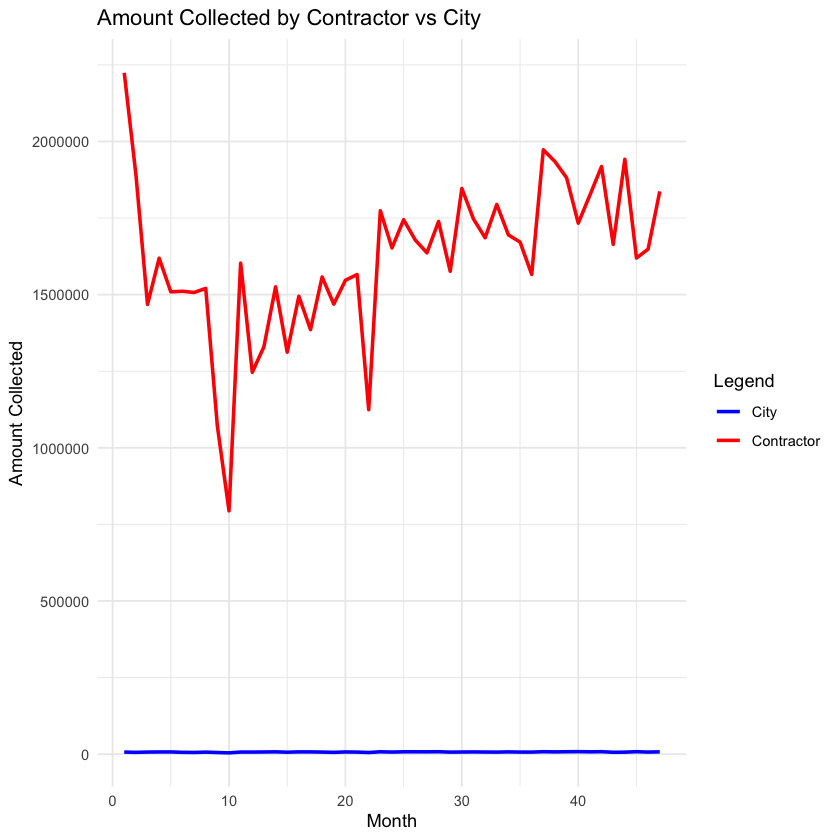

In [7]:
# create a graph of the amounts collected by Contractors Vs City. 
# There should be a line for each Contractor and City. Contractor should be blue and City should be red.

ggplot() +
  geom_line(data=meters, aes(x=month, y=Contractor, color="Contractor"), size=1) +
  geom_line(data=meters, aes(x=month, y=City, color="City"), linewidth=1) +
  xlab("Month") + 
  ylab("Amount Collected") + 
  ggtitle("Amount Collected by Contractor vs City") +
  scale_color_manual(name = "Legend", values = c("Contractor" = "red", "City" = "blue")) +
  theme_minimal()

Visualizing **Contractor** and **City** together shows that the government’s amounts often appear lower, making it difficult to compare trends at a glance. 

---

In [8]:
cor(meters$Contractor, meters$City, use="complete")

[1] 0.6008781

Examining the correlation coefficient (around 0.60) reveals a moderate positive linear relationship. If there were absolutely no irregularities, one might expect a stronger correlation if both entities collected proportionally similar amounts across all months.  

---

## Linear Modeling

To formalize this relationship, we can fit a simple linear regression model where **City** is used to predict **Contractor**:

In [9]:
my_y = matrix(meters$Contractor, ncol=1)
my_x = matrix(c(rep(1, length(meters$City)), meters$City), ncol=2)

xtx = t(my_x) %*% my_x
xtx_inv = solve(xtx)
B_hat= xtx_inv %*% t(my_x) %*% my_y
B_hat

355320.6811
184.4859


In [10]:
model1 = lm(Contractor ~ City, data=meters)
summary(model1)
names(model1)


Call:
lm(formula = Contractor ~ City, data = meters)

Residuals:
    Min      1Q  Median      3Q     Max 
-341388 -123223   -9655   87262  627551 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 355320.68  252229.69   1.409    0.166    
City           184.49      36.58   5.043 7.98e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 204100 on 45 degrees of freedom
Multiple R-squared:  0.3611,	Adjusted R-squared:  0.3469 
F-statistic: 25.43 on 1 and 45 DF,  p-value: 7.98e-06


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

From both methods, the best-fit line is:
  
```
Contractor = 355320 + 184 × City
```

The slope of about 184 indicates that for each additional dollar collected by the city on those 47 meters, private contractors brought in an additional \$184 across the larger set of meters they serviced. This is a broad average effect and doesn’t by itself confirm or deny theft.  

---

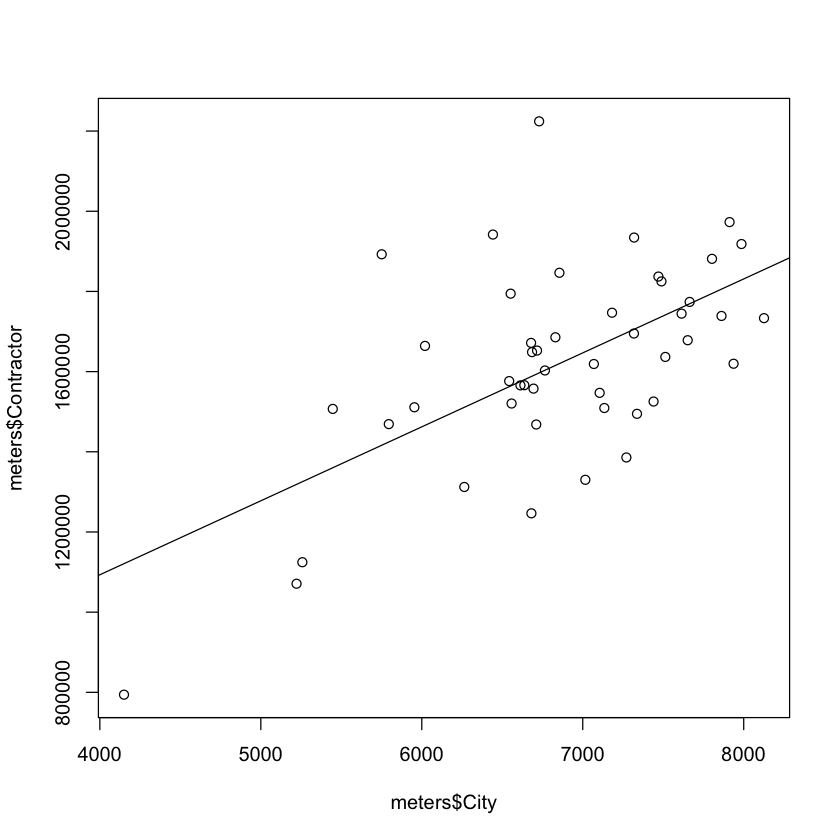

In [11]:
plot(meters$City, meters$Contractor)
abline(model1)

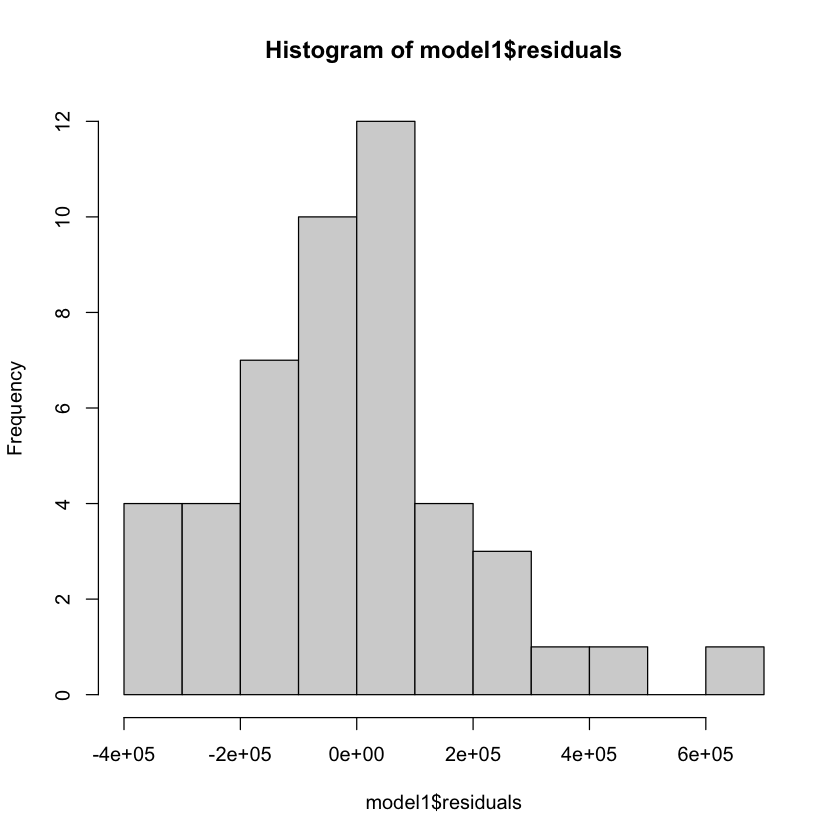

In [12]:
hist(model1$residuals)

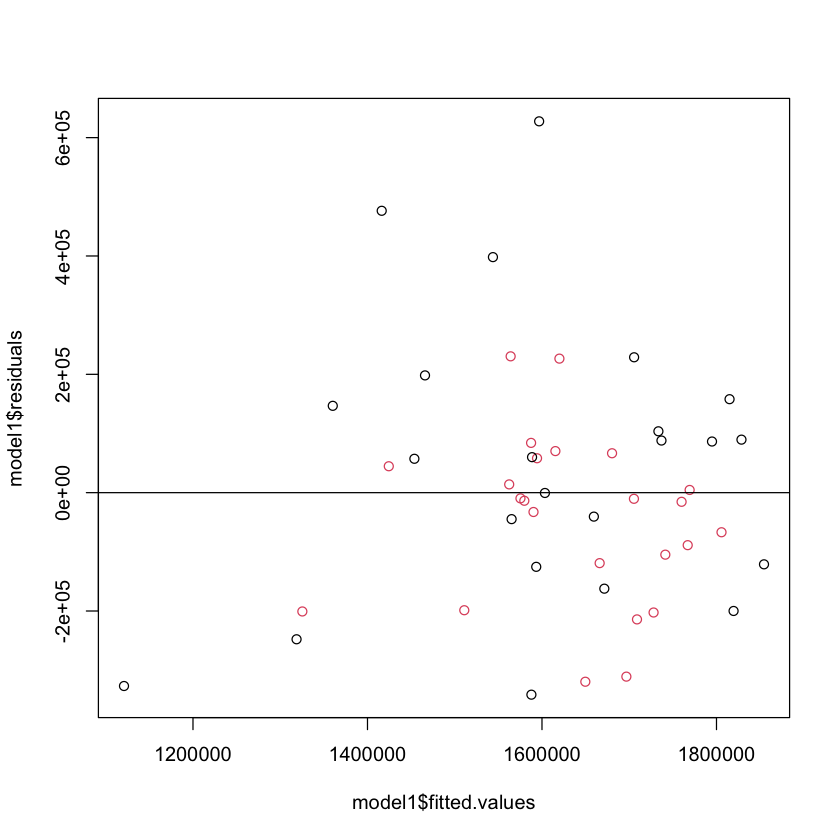

In [13]:
plot(model1$fitted.values, model1$residuals, col=Collector+1)
abline(h=0)

A quick look at residual plots suggests variability that does not immediately discredit the linear assumption, but also shows that the correlation is far from perfect.

---

## Modeling Without Brink’s

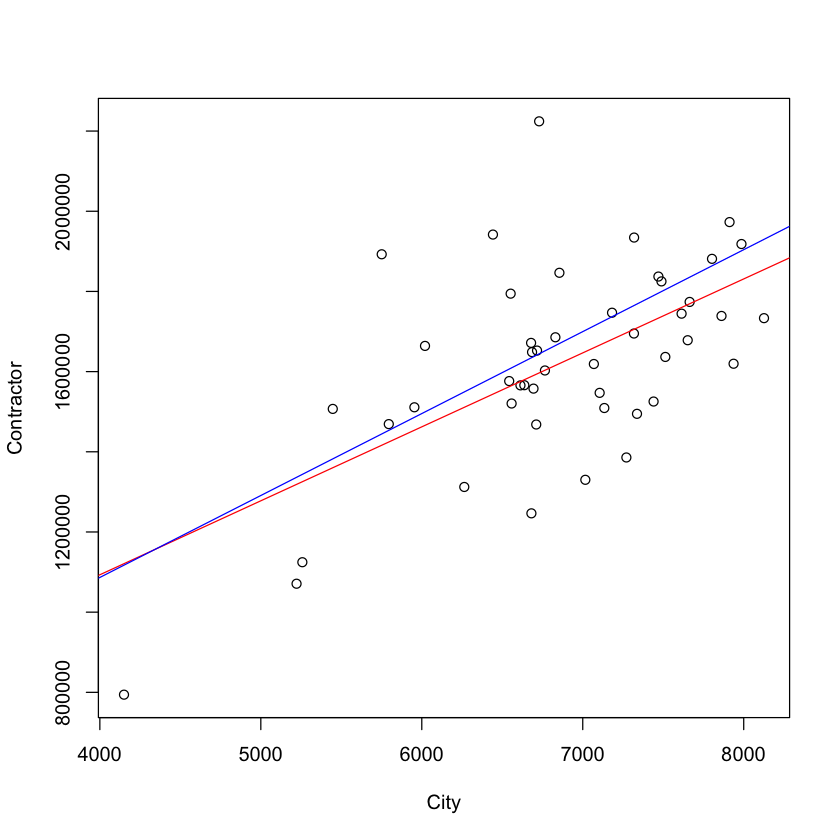

In [14]:
# create a model without Brinks 
model_no_brinks = lm(Contractor[Collector==0] ~ City[Collector==0], data=meters)
plot (City, Contractor)
abline(model1, col="red")
abline(model_no_brinks, col="blue")

By fitting a separate model without Brink’s data (blue regression line) and comparing it to the model using **all** private contractor data (red regression line), we see that the slope differs. The blue line (honest contractors only) is steeper, suggesting that when Brink’s data is included, the overall relationship between government amounts and total private amounts weakens.  

---

In [15]:
sum(Contractor[Collector==0])
sum(model_no_brinks$fitted.values)

[1] 37942672

[1] 37942672

For the non-Brink’s subset, the total actual amount collected matches perfectly with the total predicted by the model. This is a standard property of least squares regression (the sum of residuals is zero).  

---

In [16]:
a <- coef(model_no_brinks)[1]  
b <- coef(model_no_brinks)[2]  

pred_brinks = a + b * City[Collector==1]

honest = sum(pred_brinks)
fraudster = sum(Contractor[Collector==1])

total_stolen = honest - fraudster
total_stolen

[1] 2350920

By taking the intercept and slope from the “honest” contractor model and applying it to the months in which Brink’s was responsible for collections, the expected amount is the sum of those predictions. The difference between this “expected” sum and what Brink’s actually turned in is an estimate of the shortfall. In this dataset, it suggests that Brink’s may have underreported revenues by around \$2.35 million.

---

## Conclusion

Through this exploratory data analysis, we see that private contractors, including Brink’s, collected substantially more revenue overall than the government did on its subset of parking meters. A simple linear model shows a moderate positive correlation between private and government amounts. However, removing Brink’s data and then comparing the expected amounts for Brink’s months to the actual amounts suggests that Brink’s totals fall short by roughly \$2.35 million. While these results do not prove guilt or innocence on their own, they support the city’s suspicion that significant sums of money may have gone unreported during Brink’s months of collection.